<a href="https://colab.research.google.com/github/PankajBGadge/Yes-Bank-Stock-Closing-Price-/blob/main/Pankaj_B_GadgeYes_Bank_Stock_Closing_Price_Capstone_Project_ipynseb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# <b>Problem Statement: The main objective is to predict the stock’s closing price of the month. </b>


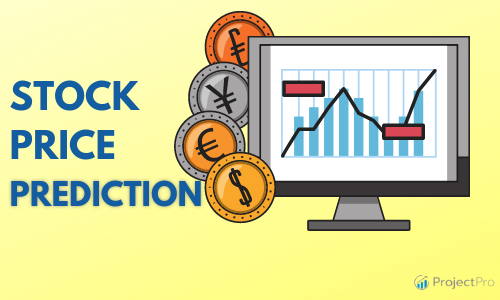

# **Variable Description**

'Open': It means the price at which a stock started trading when the opening bell rang..,

'Close':It is the price of an individual stock when the stock exchange closed shop for the day..

'High':It is the highest price at which a stock is traded during a period.

'Low':It is the lowest price of the period



In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

from plotly.offline import plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**
If we load large dataset directly,it create error when running. So we run dataset using encoding.

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project 2 Regression/data_YesBank_StockPrices.csv')

# **Data Inspection**

In [ ]:
dataset.head(20)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
dataset.dropna(inplace=True)


In [ ]:
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset['Next_Month']=dataset['Close'].shift(-1)

In [ ]:
dataset['Target']=(dataset['Next_Month']>dataset['Close']).astype(int)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Next_Month,Target
0,2005-07-01,13.00,14.00,11.25,12.46,13.42,1
1,2005-08-01,12.58,14.88,12.55,13.42,13.30,0
2,2005-09-01,13.48,14.87,12.27,13.30,12.99,0
3,2005-10-01,13.20,14.47,12.40,12.99,13.41,1
4,2005-11-01,13.35,13.88,12.88,13.41,13.71,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



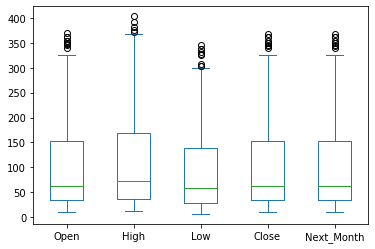

In [ ]:
dataset[['Open','High','Low','Close','Next_Month']].plot(kind='box')

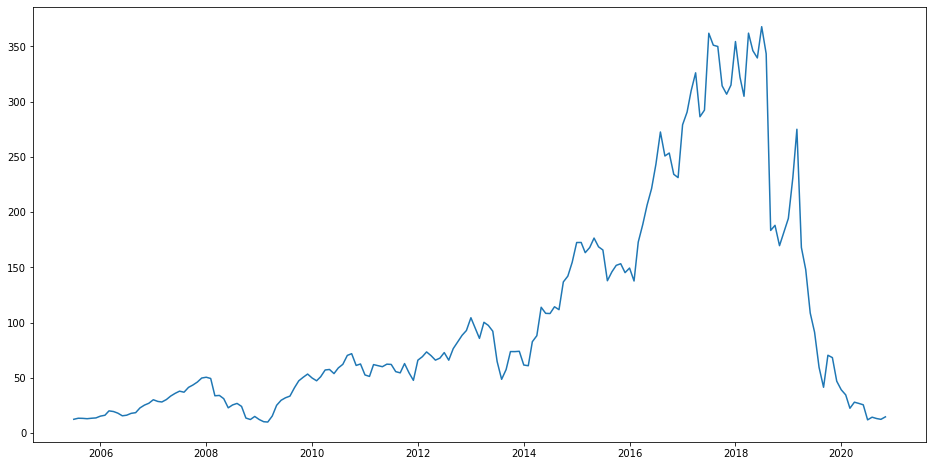

In [ ]:

#setting index as date
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['Close'], label='Close Price history')

In [ ]:
# Create a list of independent variables
independent_variables =['Close','Open','High','Low']

In [ ]:
X=np.array(dataset.index).reshape(-1,1)
y=dataset['Close']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg=regressor.fit(X_train, y_train)


In [ ]:
reg.score(X_train, y_train)


0.3240069079576757

In [ ]:
reg.coef_

array([187.46851993])

In [ ]:
reg.intercept_

6.494712315515741

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
mean_squared_error(y_test, y_pred)

6407.217546276453

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

78.15374326361867

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

80.0450969533828

In [ ]:
r2_score(y_train, y_pred_train)

0.3240069079576757

In [ ]:
r2_score(y_test, y_pred)

0.43076820772013136

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.43076820772013136
Adjusted R2 :  0.4145044422264209


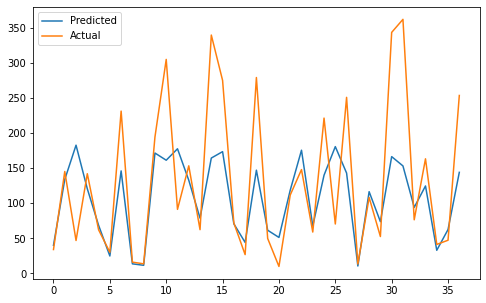

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.32400690794439

In [ ]:
lasso.coef_

array([187.46731948])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+05, tolerance: 1.027e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+05, tolerance: 1.173e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+05, tolerance: 1.128e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -6670.387786076326


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

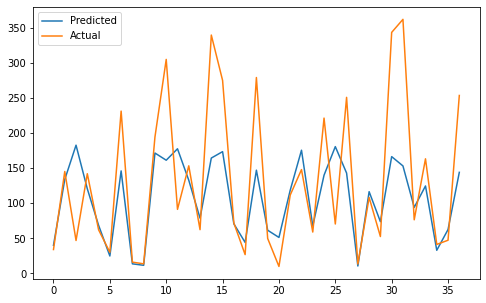

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6407.217546276453
RMSE : 80.0450969533828
R2 : 0.43076820772013136
Adjusted R2 :  0.4145044422264209


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
rid=ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -6554.9801210008145


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
rid.score(X_train, y_train)

-6124.48682965589

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6643.187163705845
RMSE : 81.50574926780223
R2 : 0.4098041297435706
Adjusted R2 :  0.39294139059338695


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.2779343235925755

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7946.495471606848
RMSE : 89.14311791499581
R2 : 0.29401525280261576
Adjusted R2 :  0.27384426002554774


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+05, tolerance: 1.027e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+05, tolerance: 1.173e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.691e+05, tolerance: 1.128e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}

Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -6661.036329414412


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6583.063387217409
RMSE : 81.13607944199306
R2 : 0.415145662913306
Adjusted R2 :  0.3984355389965434


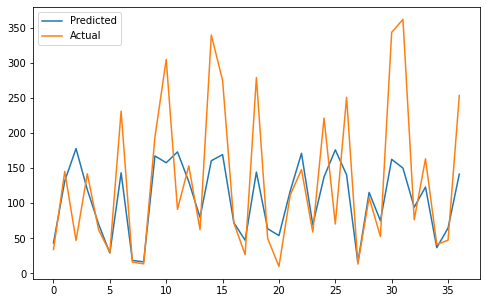

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Lets collect all our best models !**

In [ ]:
models = [LinearRegression(),Lasso(), Ridge(), ElasticNet()]

In [ ]:
def model_metric(models,X_train, X_test, y_train, y_test):
  
  cols = ['Score', 'Coefficient', 'Intercept', 'Train MSE', 'Test MSE', 'Train RMSE',
          'Test RMSE', 'Train r2 score', 'Test r2 score', 'Test Adjusted r2 score']
  model_df = pd.DataFrame(columns=cols)
   
  i = 0
  for model in models:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Score'] = model.score(X_train, y_train)
    model_df.loc[i,'Coefficient'] = model.coef_
    model_df.loc[i,'Intercept'] = model.intercept_
    model_df.loc[i,'Train MSE'] = mean_squared_error(y_train, y_pred_train)
    model_df.loc[i,'Test MSE'] = mean_squared_error(y_test, y_pred)
    model_df.loc[i,'Train RMSE'] = math.sqrt(mean_squared_error(y_train, y_pred_train))
    model_df.loc[i,'Test RMSE'] = math.sqrt(mean_squared_error(y_test, y_pred))
    model_df.loc[i,'Train r2 score'] = r2_score(y_train, y_pred_train)
    model_df.loc[i,'Test r2 score'] = r2_score(y_test, y_pred)
    
    model_df.loc[i,'Test Adjusted r2 score'] = (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))).round(2)

    

    i+=1

  return model_df

In [ ]:
model_df=model_metric(models,X_train, X_test, y_train, y_test)

In [ ]:
model_df

,Score,Coefficient,Intercept,Train MSE,Test MSE,Train RMSE,Test RMSE,Train r2 score,Test r2 score,Test Adjusted r2 score
0,0.324007,[187.46851992827837],6.494712,6108.007586,6407.217546,78.153743,80.045097,0.324007,0.430768,0.41
1,0.322678,[175.46399102060718],12.378422,6120.012115,6407.217546,78.230506,80.045097,0.322678,0.430768,0.41
2,0.322183,[173.40347263167365],13.388332,6124.48683,6407.217546,78.259101,80.045097,0.322183,0.430768,0.41
3,0.083389,[25.915367331641146],85.675819,8282.138809,6407.217546,91.006257,80.045097,0.083389,0.430768,0.41
